In [22]:
import networkx as nx
import matplotlib.pyplot as plt

Tworzenie grafu
By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [42]:
G = nx.Graph() # Undirected Simple
G.add_node(1)
G.add_nodes_from([2, 3])
print (H)
G.add_nodes_from(H)
G.add_edge(1, 2)
G.add_edge(3,5)
G.add_edge(6,0)
G.add_edges_from([(1, 2), (1, 3)])
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1


[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (3, 5), (0, 6)]
[2, 3]
2


In [21]:
#Rysowanie grafu

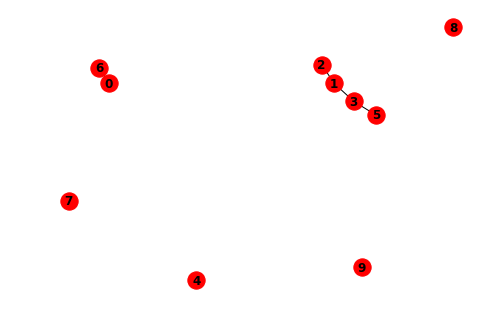

In [28]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [35]:
# Layouty i opcje rysowania


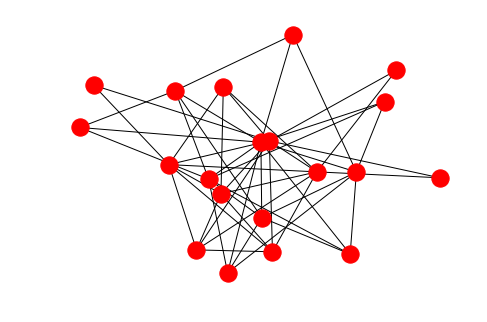

In [33]:
# Generatory grafow
G2 = nx.networkx.generators.barabasi_albert_graph(10, 5)
nx.draw(G2)
plt.show()

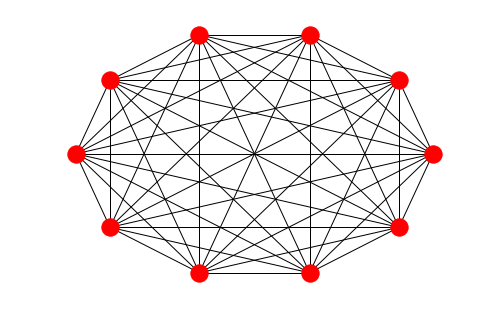

[(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


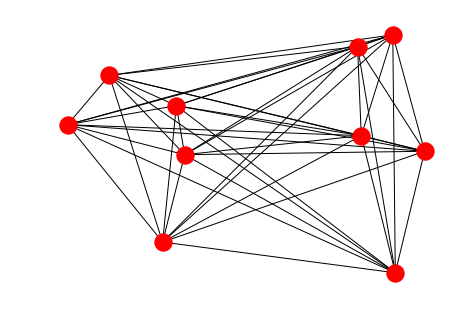

[(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


In [66]:
# Zadanie 1
# Stworz pelny graf o 10 wierzcholkach na dwa rozne sposoby i wyswietl je obok siebie korzystajac
# z roznych circular layout i random layout
full_graph = nx.networkx.generators.complete_graph(10)
nx.draw(full_graph, pos=nx.circular_layout(full_graph))
plt.show()
print(full_graph.degree)


full_graph_2 = nx.Graph()
for idx in range(0,10):
    for idx_2 in range(idx+1, 10):
        full_graph_2.add_edge(idx, idx_2)
        full_graph_2.add_edge(idx_2, idx)
pos = nx.random_layout(full_graph_2)
nx.draw(full_graph_2, pos=pos)
plt.show()
print(full_graph_2.degree)

# Tu potrzebne jakies sprawdzenie albo jakis assert

In [67]:
# Wczytywanie grafu z pliku (potrzebne do zadania personanlego)

In [68]:
# Wybor algorytmow community
# co to jest community itd
# jakis prosty algorytm community detetion


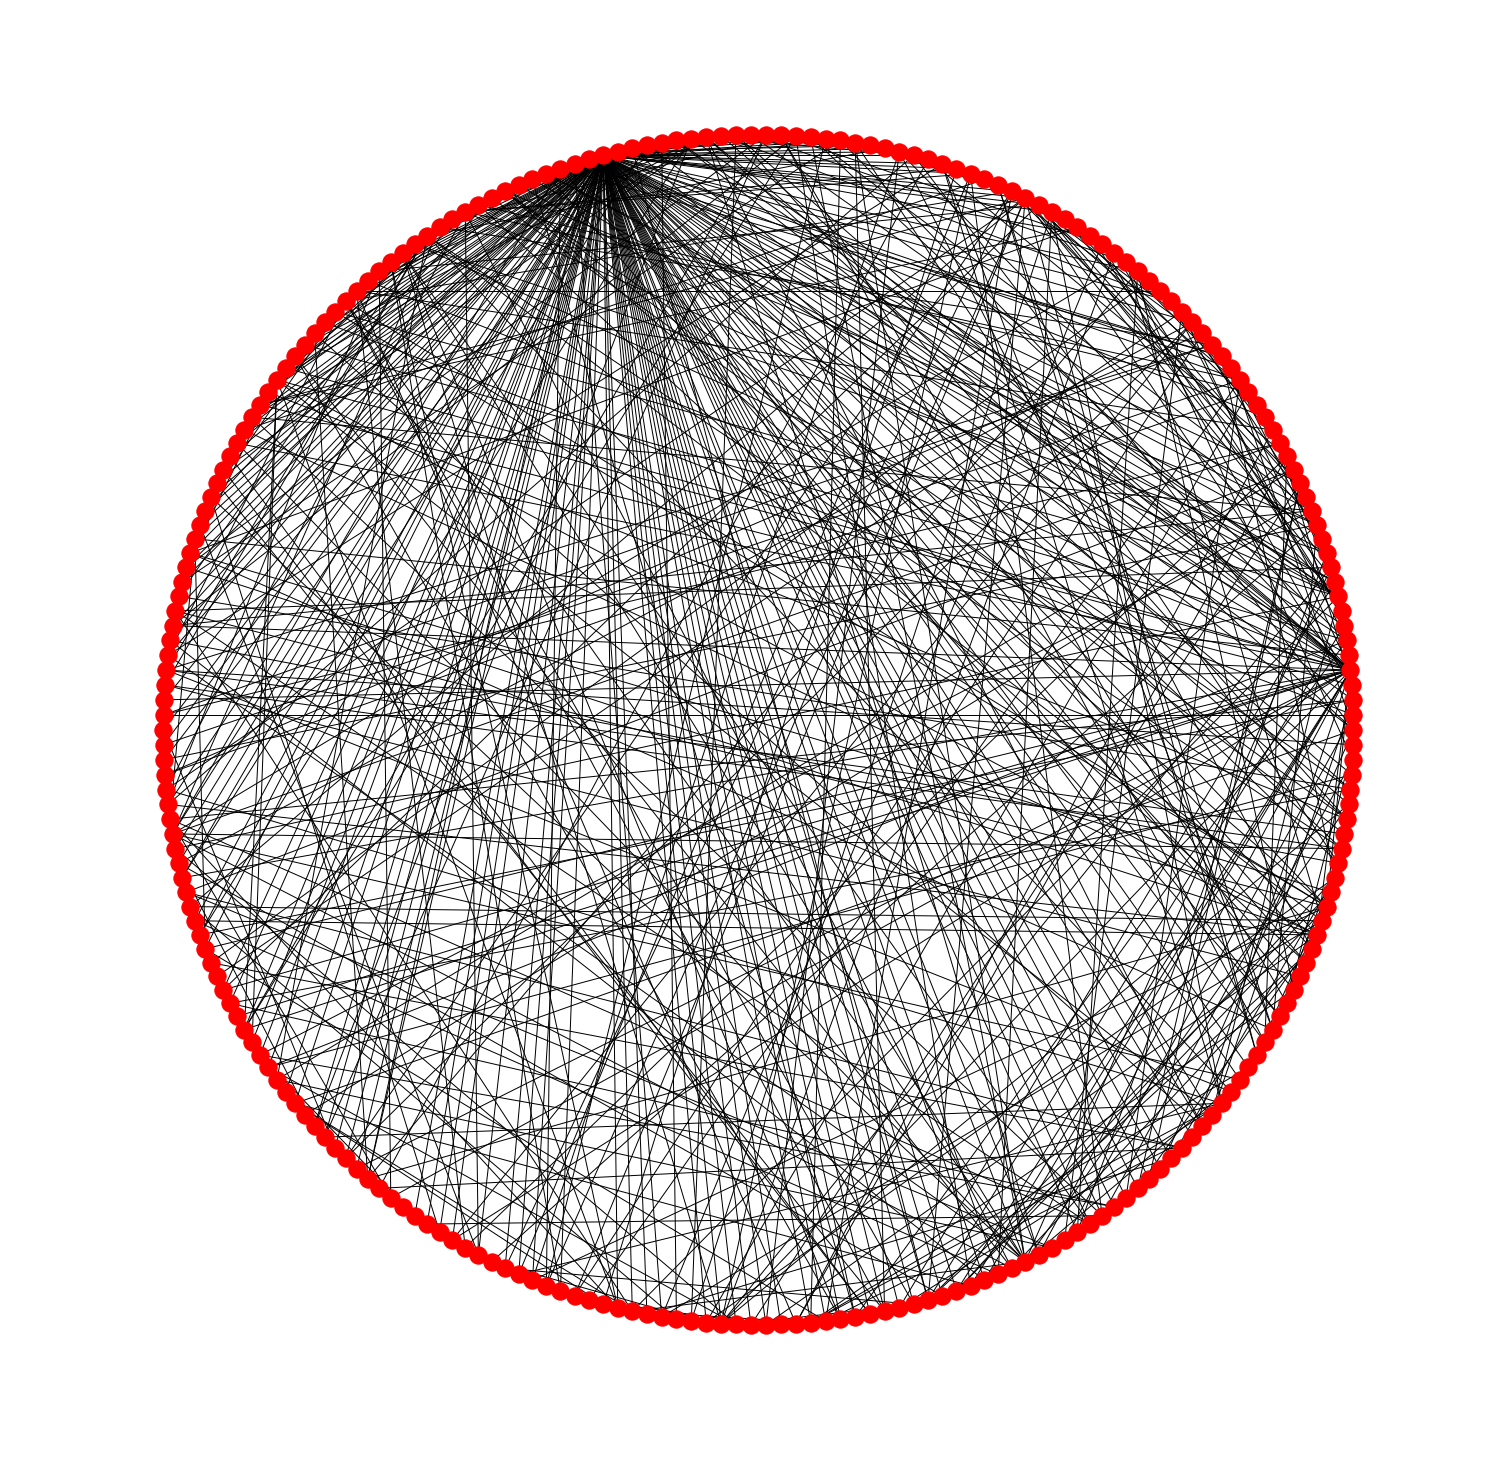

In [104]:
# Generowanie grafu ktory ma community:
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.community_generators.LFR_benchmark_graph.html#networkx.algorithms.community.community_generators.LFR_benchmark_graph

from networkx.algorithms.community import LFR_benchmark_graph
from matplotlib.pyplot import figure

n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20,
                        seed=10)
communities = {frozenset(G.nodes[v]['community']) for v in G}
figure(figsize=(20,20))
nx.draw(G, pos=nx.circular_layout(G))

plt.show()